In [11]:
#Importing necessary libraries
import sklearn.metrics as metrics
import datetime
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import math
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [12]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000);
pd.set_option('display.max_rows', 1000);
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [13]:
#Reading the data file
df = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/eda_sa_2021_2022.xlsx")

In [14]:
df.shape

(31060, 117)

In [15]:
df.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31060 entries, 0 to 31059
Data columns (total 117 columns):
 #    Column                   Non-Null Count  Dtype 
---   ------                   --------------  ----- 
 0    _STATE                   31060 non-null  int64 
 1    FMONTH                   31060 non-null  int64 
 2    IDATE                    31060 non-null  int64 
 3    IMONTH                   31060 non-null  int64 
 4    IDAY                     31060 non-null  int64 
 5    IYEAR                    31060 non-null  int64 
 6    SEXVAR                   31060 non-null  int64 
 7    GENHLTH                  31060 non-null  int64 
 8    PHYSHLTH                 31060 non-null  int64 
 9    MENTHLTH                 31060 non-null  int64 
 10   PRIMINSR                 31060 non-null  int64 
 11   PERSDOC3                 31060 non-null  int64 
 12   MEDCOST1                 31060 non-null  int64 
 13   CHECKUP1                 31060 non-null  int64 
 14   EXERANY2            

In [16]:
# Creating a deep copies of the main DataFrame
dfcopy = df.copy(deep=True)

After the EDA process, it was found that :
1. Few features that are highly correlated or have similar distribution need to be dropped.
2. Features that were created for EDA process need to be dropped.
3. Features that are used in the creation of output field need to be dropped.
4. Features that are skewed and need outlier management need to be dropped.
5. Few rows which have values 7,9 in certain features needs correction.

In [17]:
# Removing the features with knowledge post EDA
df.drop(['USENOW3','ECIGNOW1','ALCDAY5','MARIJAN1','TOBA_ABUSER','ECIG_ABUSER','MARIJ_ABUSER','ALCO_ABUSER','LEVEL_ABUSER',
         'TYPE_ABUSER','CATEGORY_ABUSER','DISABILITY','VULNERABLE','CHRONIC','CHRONIC_CATEGORY','_GENERATION',
         'Chronic_Conditions_List','_DRNKWK1','DROCDY3_','HEIGHT3','WEIGHT2','CHILDREN','_MRACE1','_PRACE1','IMONTH','FMONTH',
         'PHYSHLTH','MENTHLTH','ACESCORE','ACESCORE_REASON'], axis=1, inplace=True)

<Axes: >

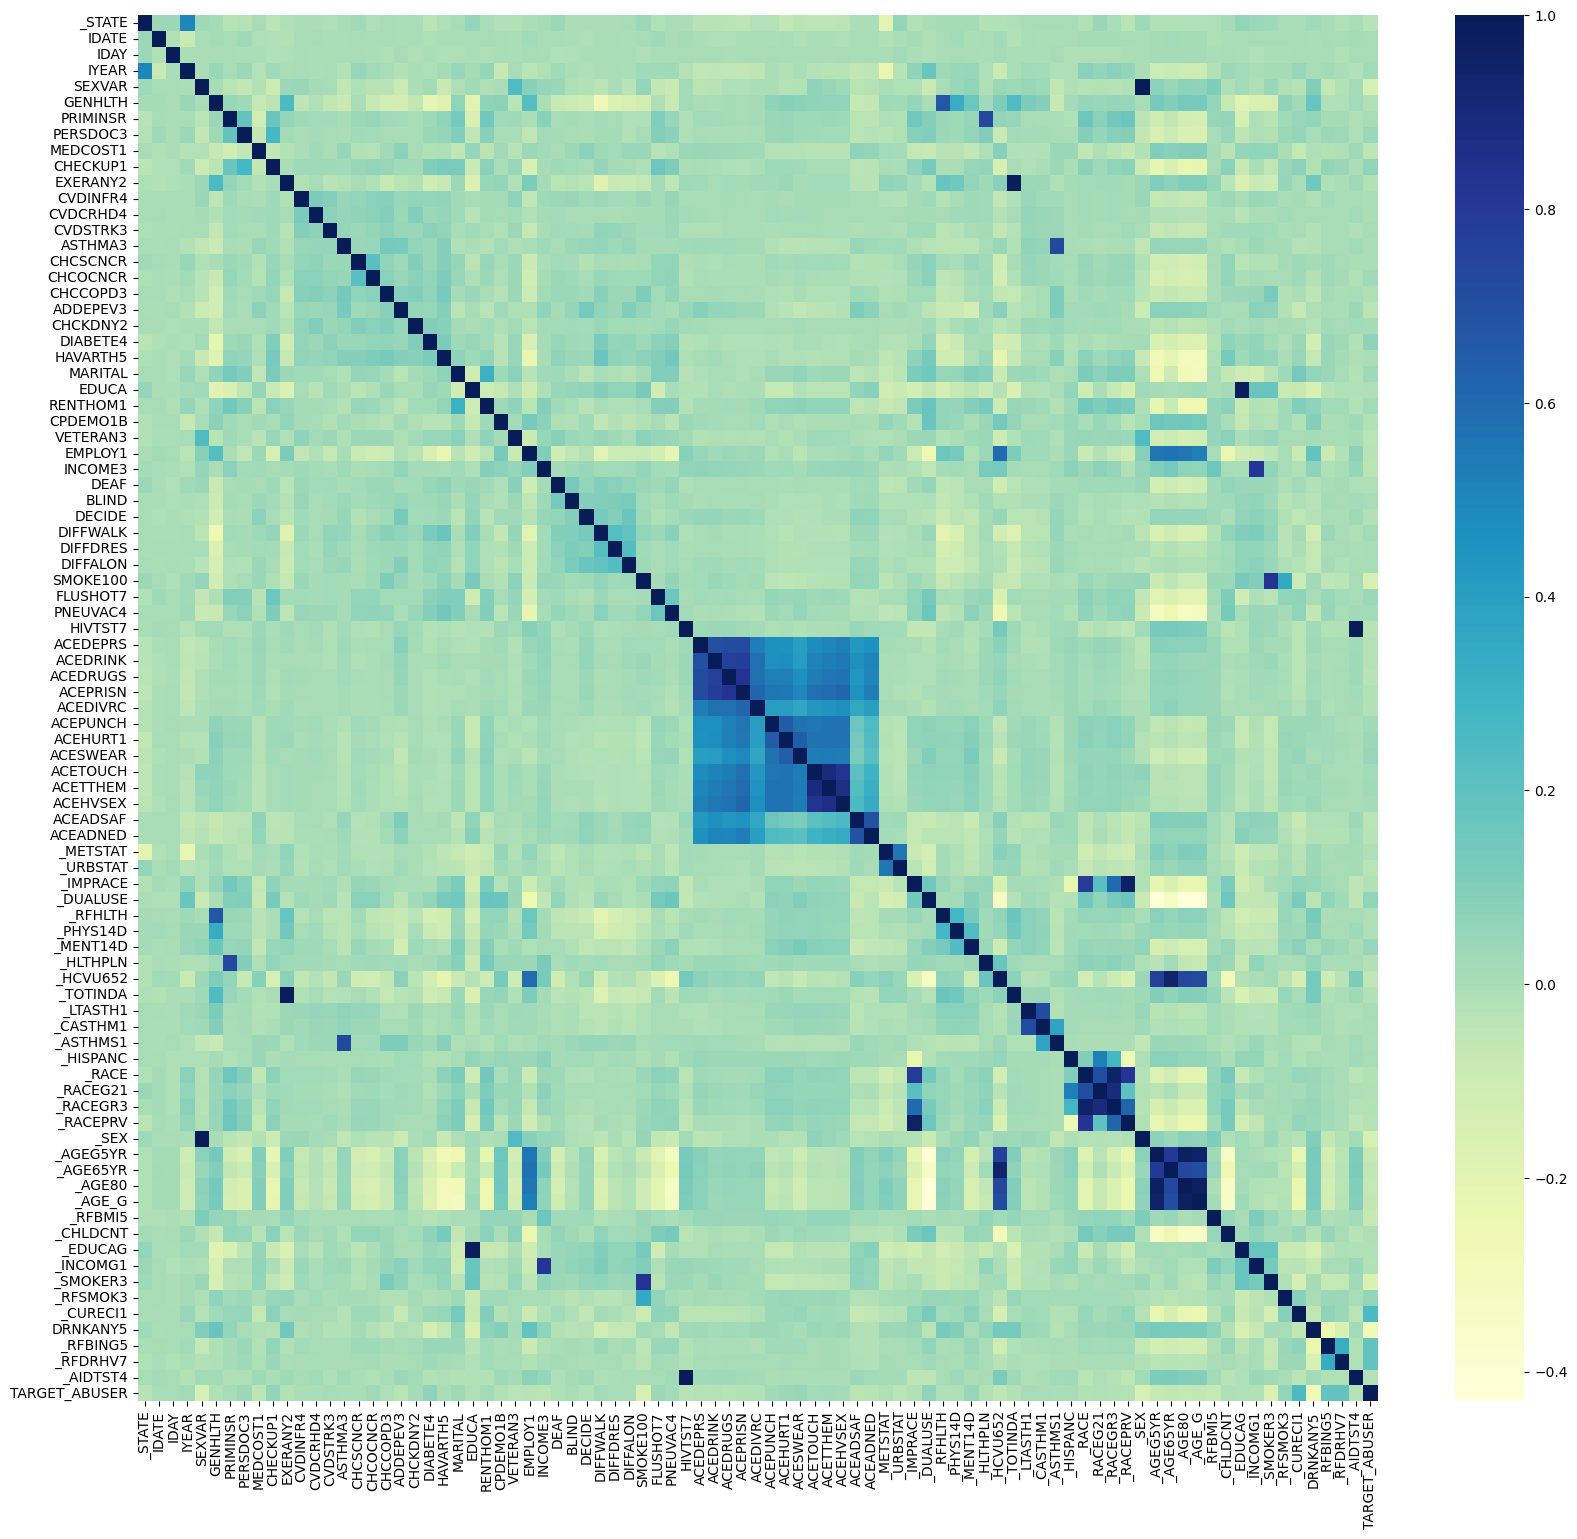

In [18]:
#Plotting a correlation matrix to check for highly correlated features and drop them
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),cmap="YlGnBu")

Very Highly correlated pairs are:
_SEX and SEXVAR, _TOTINDA and EXERANY2, _EDUCAG and EDUCA, HIVTST7 and _AIDTST4, _RACEPRV and _IMPRACE, _AGE65YR and _HCVU652, _RACEPRV and _RACE, _AGEG5YR and _AGE80 and _AGE_G

In [19]:
# Removing the one feature from with very highly correlated pairs
df.drop(['_SEX','_TOTINDA','_EDUCAG','_AIDTST4','_RACEPRV','_AGE65YR','_AGE_G','_AGE80'], axis=1, inplace=True)

In [20]:
df.shape

(31060, 79)

## Feature Selection

In [21]:
# Creating a deep copies of the main DataFrame
dfcopy = df.copy(deep=True)
# Creating a deep copies of the DataFrame
df1 = dfcopy.copy(deep=True)
df2 = dfcopy.copy(deep=True)
df3 = dfcopy.copy(deep=True)
df4 = dfcopy.copy(deep=True)
df5 = dfcopy.copy(deep=True)
df6 = dfcopy.copy(deep=True)
df7 = dfcopy.copy(deep=True)
df8 = dfcopy.copy(deep=True)
df9 = dfcopy.copy(deep=True)
df10 = dfcopy.copy(deep=True)

##### 1. Filtering Methods - Information Gain and Fisher's Score

In [22]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif

# Separating features and target variable
X = df1.drop(columns=['TARGET_ABUSER'])  # Features
y = df1['TARGET_ABUSER']  # Target variable

# Information Gain
selector_info_gain = SelectKBest(score_func=mutual_info_classif, k=30)
X_selected_info_gain = selector_info_gain.fit_transform(X, y)
selected_features_info_gain = X.columns[selector_info_gain.get_support()]
print("Selected features using Information Gain:", selected_features_info_gain)

# Fisher's Score
selector_fisher_score = SelectKBest(score_func=f_classif, k=30)
X_selected_fisher_score = selector_fisher_score.fit_transform(X, y)
selected_features_fisher_score = X.columns[selector_fisher_score.get_support()]
print("Selected features using Fisher's Score:", selected_features_fisher_score)


Selected features using Information Gain: Index(['SEXVAR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'CVDINFR4', 'ASTHMA3', 'CHCSCNCR', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'HAVARTH5', 'MARITAL', 'DEAF', 'BLIND', 'DECIDE', 'SMOKE100', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEHURT1', 'ACESWEAR', '_LTASTH1', '_RFBMI5', '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', '_RFBING5', '_RFDRHV7'], dtype='object')
Selected features using Fisher's Score: Index(['_STATE', 'SEXVAR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'ADDEPEV3', 'DIABETE4', 'MARITAL', 'VETERAN3', 'EMPLOY1', 'INCOME3', 'SMOKE100', 'FLUSHOT7', 'HIVTST7', 'ACEHURT1', 'ACESWEAR', 'ACEADSAF', 'ACEADNED', '_URBSTAT', '_DUALUSE', '_MENT14D', '_HCVU652', '_AGEG5YR', '_RFBMI5', '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', '_RFBING5', '_RFDRHV7'], dtype='object')


In [23]:
infogain = ['SEXVAR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'CVDINFR4', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD3',
            'CHCKDNY2', 'DEAF', 'BLIND', 'DECIDE', 'SMOKE100', 'FLUSHOT7', 'HIVTST7', 'ACEDRUGS', 'ACEPRISN', 'ACESWEAR', 'ACEADSAF',
            '_METSTAT', '_HCVU652', '_ASTHMS1', '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', '_RFBING5', '_RFDRHV7', 'TARGET_ABUSER']

fisher = ['_STATE', 'SEXVAR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'ADDEPEV3', 'DIABETE4', 'MARITAL', 'VETERAN3', 'EMPLOY1', 'INCOME3',
          'SMOKE100', 'FLUSHOT7', 'HIVTST7', 'ACEHURT1', 'ACESWEAR', 'ACEADSAF', 'ACEADNED', '_URBSTAT', '_DUALUSE', '_MENT14D', '_HCVU652',
          '_AGEG5YR', '_RFBMI5', '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', '_RFBING5', '_RFDRHV7', 'TARGET_ABUSER']

In [24]:
df1 = df1[infogain]
df2 = df2[fisher]

0.8678594425535829
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      7555
           1       0.75      0.38      0.50      1763

    accuracy                           0.86      9318
   macro avg       0.81      0.67      0.71      9318
weighted avg       0.85      0.86      0.84      9318

Area Under the Curve 0.6745401185407973
Confusion Matrix : 
[[7334  221]
 [1096  667]]


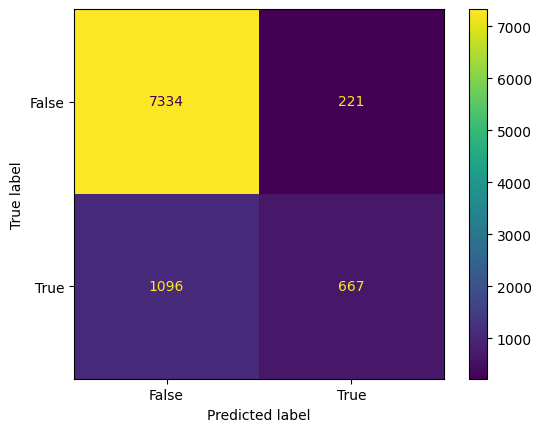

Root Mean Square Error:

0.37595125110404504


In [25]:
#Separating the dataframe
X = df1.drop(columns=['TARGET_ABUSER'])  # Features
y = df1['TARGET_ABUSER']  # Target variable
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = RandomForestClassifier(max_depth= 10, min_samples_split= 10, n_estimators= 200)
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

0.8752184711618066
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      7553
           1       0.77      0.36      0.49      1765

    accuracy                           0.86      9318
   macro avg       0.82      0.67      0.71      9318
weighted avg       0.85      0.86      0.84      9318

Area Under the Curve 0.6688947115548706
Confusion Matrix : 
[[7357  196]
 [1123  642]]


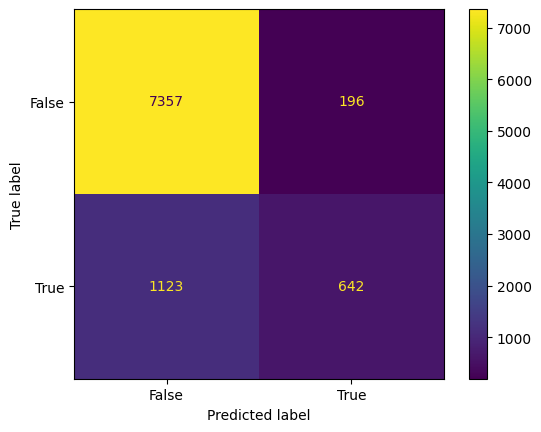

Root Mean Square Error:

0.3762366031383752


In [26]:
#Separating the dataframe
X = df2.drop(columns=['TARGET_ABUSER'])  # Features
y = df2['TARGET_ABUSER']  # Target variable
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = RandomForestClassifier(max_depth= 10, min_samples_split= 10, n_estimators= 200)
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

##### 2. Wrapper Methods - Recursive Feature Elimination

In [27]:
X = df3.drop(['TARGET_ABUSER'], axis=1)
y = df3['TARGET_ABUSER']
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# use RFE to select 30 features with the linear regression
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=30)

X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# show selected features
print('Selected features: {}'.format(list(X.columns[rfe.support_])))

Selected features: ['IYEAR', 'SEXVAR', 'MEDCOST1', 'CHECKUP1', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'ADDEPEV3', 'DIABETE4', 'HAVARTH5', 'SMOKE100', 'ACEDRUGS', 'ACETTHEM', 'ACEADNED', '_METSTAT', '_URBSTAT', '_IMPRACE', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_RACE', '_RACEG21', '_RACEGR3', '_CHLDCNT', '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', '_RFBING5', '_RFDRHV7']


In [29]:
rfe = ['IYEAR', 'SEXVAR', 'MEDCOST1', 'CHECKUP1', 'CVDSTRK3', 'CHCSCNCR', 'ADDEPEV3', 'DIABETE4', 'HAVARTH5', 'SMOKE100', 'ACEDRUGS',
       'ACETOUCH', 'ACETTHEM', 'ACEADNED', '_METSTAT', '_URBSTAT', '_IMPRACE', '_MENT14D', '_LTASTH1', '_RACE', '_RACEG21', '_RACEGR3',
       '_RFBMI5', '_CHLDCNT', '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', '_RFBING5', '_RFDRHV7', 'TARGET_ABUSER']

In [30]:
df3 = df3[rfe]

0.8708030539968724
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      7574
           1       0.72      0.37      0.49      1744

    accuracy                           0.85      9318
   macro avg       0.79      0.67      0.70      9318
weighted avg       0.84      0.85      0.84      9318

Area Under the Curve 0.666827743027208
Confusion Matrix : 
[[7326  248]
 [1105  639]]


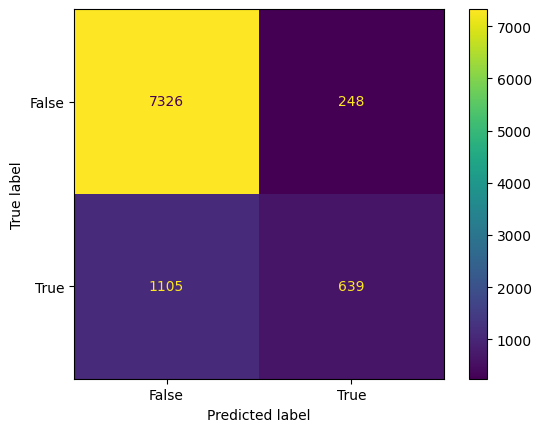

Root Mean Square Error:

0.3810548952920224


In [31]:
#Separating the dataframe
X = df3.drop(columns=['TARGET_ABUSER'])  # Features
y = df3['TARGET_ABUSER']  # Target variable
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = RandomForestClassifier(max_depth= 10, min_samples_split= 10, n_estimators= 200)
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

##### 3. Embedded Methods - BORUTA

In [32]:
!pip install boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.3 MB/s eta 0:00:00


In [33]:
X = df4.drop(['TARGET_ABUSER'], axis=1)
y = df4['TARGET_ABUSER']
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [34]:
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

In [35]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=10)

boruta_selector = BorutaPy(clf, random_state=42, verbose=2,max_iter = 50)
X_train_bor = boruta_selector.fit(X_train.values, y_train.values)

# Print selected features
selected_features = X.columns[boruta_selector.support_]
print("Selected Features:", selected_features)

# Transform the datasets based on the selected features
X_train_boruta = boruta_selector.transform(X_train.values)
X_test_boruta = boruta_selector.transform(X_test.values)

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	8
Tentative: 	1
Rejected: 	69
Iteration: 	9 / 50
Confirmed: 	8
Tentative: 	1
Rejected: 	69
Iteration: 	10 / 50
Confirmed: 	8
Tentative: 	1
Rejected: 	69
Iteration: 	11 / 50
Confirmed: 	8
Tentative: 	1
Rejected: 	69
Iteration: 	12 / 50
Confirmed: 	8
Tentative: 	1
Rejected: 	69
Iteration: 	13 / 50
Confirmed: 	8
Tentative: 	1
Rejected: 	69
Iteration: 	14 / 50
Confirmed: 	8
Tentative: 	1
Rejected: 	69
Iteration: 	15 / 50
Confirmed: 	8
Tentative: 	1
Rejected: 	69
Iteration: 	16 / 50
Confirmed: 	8
Tentative: 	1
Rejected: 	69
Iteration: 	17 / 

0.8627541164566277
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      7538
           1       0.75      0.38      0.50      1780

    accuracy                           0.86      9318
   macro avg       0.81      0.67      0.71      9318
weighted avg       0.85      0.86      0.84      9318

Area Under the Curve 0.6734105252488515
Confusion Matrix : 
[[7315  223]
 [1110  670]]


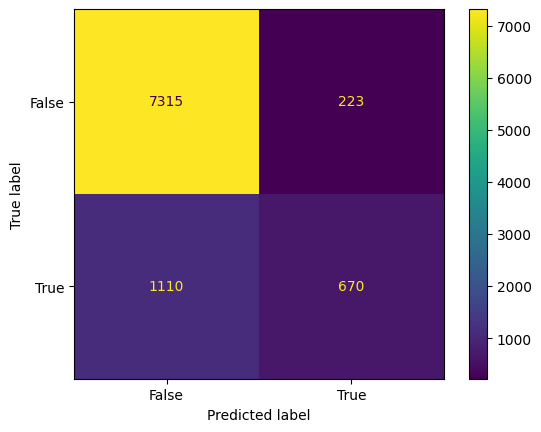

Root Mean Square Error:

0.3782280395237097


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = RandomForestClassifier(max_depth= 10, min_samples_split= 10, n_estimators= 200)
# fiting the model to data
lr.fit(X_train_boruta, y_train)
print(lr.score(X_train_boruta,y_train))
y_pred_lr = lr.predict(X_test_boruta)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

##### 4. Dimensionality Reduction Techniques - PCA

In [37]:
X = df5.drop(['TARGET_ABUSER'], axis=1)
y = df5['TARGET_ABUSER']
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

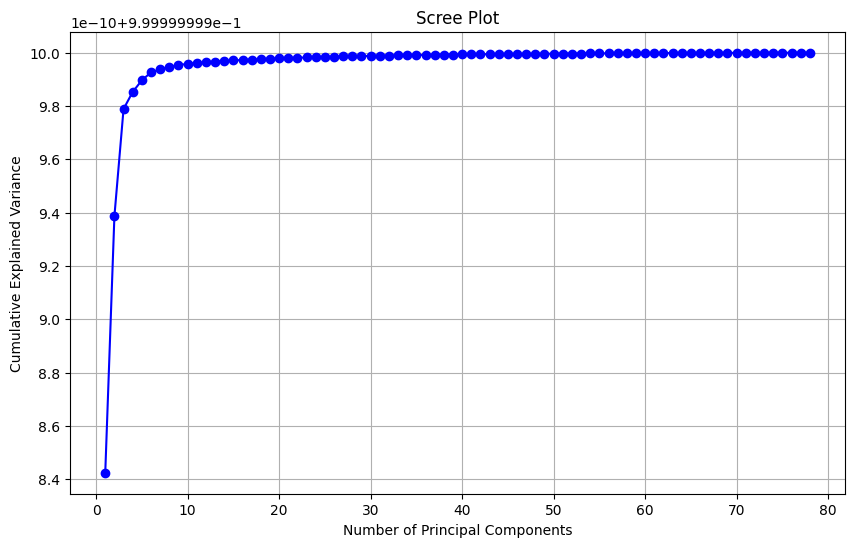

In [38]:
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_train)

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [39]:
# Perform PCA
num_components = 10  # You can adjust this based on the desired number of principal components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

0.8135406126391317


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report : 
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      7516
           1       0.00      0.00      0.00      1802

    accuracy                           0.81      9318
   macro avg       0.40      0.50      0.45      9318
weighted avg       0.65      0.81      0.72      9318

Area Under the Curve 0.5
Confusion Matrix : 
[[7516    0]
 [1802    0]]


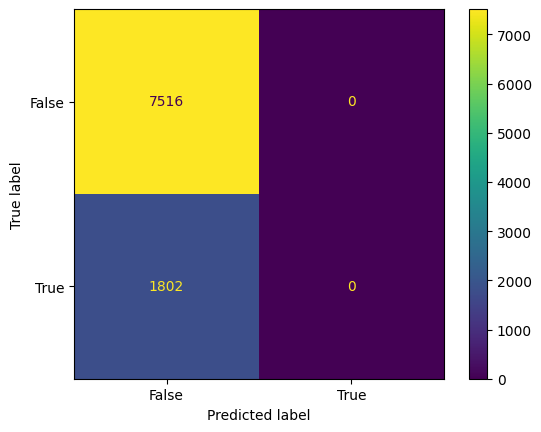

Root Mean Square Error:

0.43976032028853973


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = RandomForestClassifier(max_depth= 10, min_samples_split= 10, n_estimators= 200)
# fiting the model to data
lr.fit(X_train_pca, y_train)
print(lr.score(X_train_pca,y_train))
y_pred_lr = lr.predict(X_test_pca)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

##### 5. No feature selection applied

0.8773341918866709
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      7543
           1       0.77      0.33      0.46      1775

    accuracy                           0.85      9318
   macro avg       0.82      0.65      0.69      9318
weighted avg       0.84      0.85      0.83      9318

Area Under the Curve 0.6526086493773725
Confusion Matrix : 
[[7372  171]
 [1193  582]]


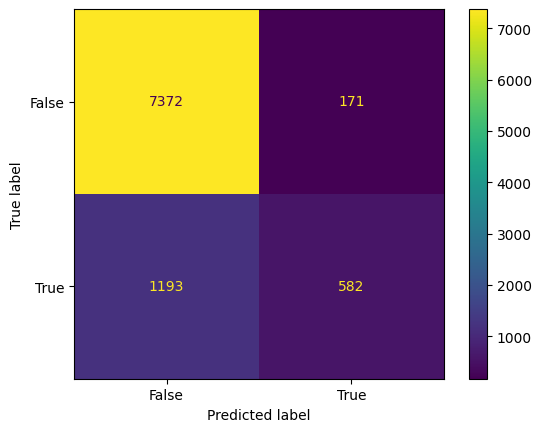

Root Mean Square Error:

0.38260076328367415


In [41]:
#Separating the dataframe
X = df6.drop(columns=['TARGET_ABUSER'])  # Features
y = df6['TARGET_ABUSER']  # Target variable
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = RandomForestClassifier(max_depth= 10, min_samples_split= 10, n_estimators= 200)
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Best performance has been of the RFE Algorithm :

Selected features: ['IYEAR', 'SEXVAR', 'MEDCOST1', 'CHECKUP1', 'CVDSTRK3', 'CHCSCNCR', 'ADDEPEV3', 'DIABETE4', 'HAVARTH5', 'SMOKE100', 'ACEDRUGS', 'ACETOUCH', 'ACETTHEM', 'ACEADNED', '_METSTAT', '_URBSTAT', '_IMPRACE', '_MENT14D', '_LTASTH1', '_RACE', '_RACEG21', '_RACEGR3', '_RFBMI5', '_CHLDCNT', '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', '_RFBING5', '_RFDRHV7']


###Domain Expert Knowledge Integration

In [42]:
df9 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/cleaned_sa_2021_2022.xlsx")

In [43]:
df9.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31060 entries, 0 to 31059
Data columns (total 133 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    _STATE         31060 non-null  int64  
 1    FMONTH         31060 non-null  int64  
 2    IDATE          31060 non-null  int64  
 3    IMONTH         31060 non-null  int64  
 4    IDAY           31060 non-null  int64  
 5    IYEAR          31060 non-null  int64  
 6    SAFETIME       20456 non-null  float64
 7    CADULT1        20456 non-null  float64
 8    CELLSEX        20456 non-null  float64
 9    PVTRESD3       20456 non-null  float64
 10   LANDLINE       20456 non-null  float64
 11   HHADULT        20456 non-null  float64
 12   SEXVAR         31060 non-null  int64  
 13   GENHLTH        31060 non-null  int64  
 14   PHYSHLTH       31060 non-null  int64  
 15   MENTHLTH       31060 non-null  int64  
 16   POORHLTH       17168 non-null  float64
 17   PRIMINSR       31060 non-null

In [44]:
df9['_BMI5'] = df9['_BMI5'].interpolate(method='linear', axis=0, limit_direction ='both')
df9['_BMI5CAT'] = df9['_BMI5CAT'].interpolate(method='linear', axis=0, limit_direction ='both')

In [45]:
df9.shape

(31060, 133)

In [46]:
#Following features have been decided upon to go ahead after discussion with domain expert
col1 = ['_SEX','_RFHLTH','_PHYS14D','_MENT14D','_HLTHPLN','PERSDOC3','MEDCOST1','_TOTINDA','CVDINFR4','CVDCRHD4','_LTASTH1','_CASTHM1','_ASTHMS1',
        'CHCSCNCR','CHCOCNCR','CHCCOPD3','CHCKDNY2','DIABETE4','HAVARTH5','ADDEPEV3','_BMI5','MARITAL','_EDUCAG','RENTHOM1','VETERAN3','EMPLOY1',
        '_CHLDCNT','_INCOMG1','DECIDE','FLUSHOT7','PNEUVAC4','_AIDTST4','ACEDEPRS','ACEDRINK','ACEDRUGS','ACEPRISN','ACEDIVRC','ACEPUNCH','ACEHURT1',
        'ACESWEAR','ACETOUCH','ACETTHEM','ACEHVSEX','ACEADSAF','ACEADNED','_METSTAT','_URBSTAT','_RACE','_AGEG5YR','_AGE65YR','TARGET_ABUSER']

In [47]:
df9=df9[col1]

In [48]:
df9.shape

(31060, 51)

In [49]:
#Renaming columns for better understanding
df9.rename(columns = {'_SEX':'SEX','_RFHLTH':'GENHLTH','_PHYS14D':'PHYHLTH','_MENT14D':'MENHLTH','_HLTHPLN':'HLTHINSU','PERSDOC2':'PERSDOC3',
                      'MEDCOST':'MEDCOST1','_TOTINDA':'EXERCISE','CHCCOPD2':'CHCCOPD3','_LTASTH1':'LTASTH1','_CASTHM1':'CASTHM1','_ASTHMS1':'ASTHMS1',
                      '_BMI5':'BMI','_EDUCAG':'EDUCA','_CHLDCNT':'CHILDCNT','_INCOMG1':'INCOME','_AIDTST4':'AIDTST4','_METSTAT':'METSTAT',
                      '_URBSTAT':'URBSTAT','_RACE':'RACE','_AGEG5YR':'AGE','_AGE65YR':'SENIOR','HAVARTH5':'HAVARTH','CHCSCNCR':'CHCSCNCRC',
                      'CHCOCNCR':'CHCOCNCRC'}, inplace = True)

In [50]:
df9.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31060 entries, 0 to 31059
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SEX            31060 non-null  int64  
 1   GENHLTH        31060 non-null  int64  
 2   PHYHLTH        31060 non-null  int64  
 3   MENHLTH        31060 non-null  int64  
 4   HLTHINSU       31060 non-null  int64  
 5   PERSDOC3       31060 non-null  int64  
 6   MEDCOST1       31060 non-null  int64  
 7   EXERCISE       31060 non-null  int64  
 8   CVDINFR4       31060 non-null  int64  
 9   CVDCRHD4       31060 non-null  int64  
 10  LTASTH1        31060 non-null  int64  
 11  CASTHM1        31060 non-null  int64  
 12  ASTHMS1        31060 non-null  int64  
 13  CHCSCNCRC      31060 non-null  int64  
 14  CHCOCNCRC      31060 non-null  int64  
 15  CHCCOPD3       31060 non-null  int64  
 16  CHCKDNY2       31060 non-null  int64  
 17  DIABETE4       31060 non-null  int64  
 18  HAVART

Features selected after discussion with domain expert:

desired = ['SEX', 'GENHLTH', 'PHYHLTH', 'MENHLTH', 'HLTHINSU', 'PERSDOC3', 'MEDCOST1', 'EXERCISE', 'LTASTH1', 'CASTHM1', 'ASTHMS1', 'CHCCOPD3',
           'CHCKDNY2', 'DIABETE4', 'HAVARTH', 'ADDEPEV3', 'BMI', 'MARITAL', 'EDUCA', 'RENTHOM1', 'VETERAN3', 'EMPLOY1', 'CHILDCNT', 'INCOME',
           'DECIDE', 'AIDTST4', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM',
           'ACEHVSEX', 'ACEADSAF', 'ACEADNED', 'METSTAT', 'URBSTAT', 'RACE', 'AGE', 'SENIOR', 'CARDIOCOND', 'CANCER', 'VACCINE','TARGET_ABUSER']

In [51]:
# Replacing 7 with 9 so as to create a common category of missing, refused or don't know for these questions
value_to_replace = 7
new_value = 9
columns_to_replace = ['PERSDOC3','MEDCOST1','CVDINFR4','CVDCRHD4','CHCSCNCRC','CHCOCNCRC','CHCCOPD3','CHCKDNY2','DIABETE4','HAVARTH','ADDEPEV3',
'RENTHOM1','VETERAN3','DECIDE','FLUSHOT7','PNEUVAC4','ACEDEPRS','ACEDRINK','ACEDRUGS','ACEPRISN','ACEDIVRC','ACEPUNCH','ACEHURT1',
 'ACESWEAR','ACETOUCH','ACETTHEM','ACEHVSEX','ACEADSAF','ACEADNED']

# Loop through each column in the list and replace the value
for column in columns_to_replace:
    df9[column] = df9[column].replace(value_to_replace, new_value)

In [52]:
#Combining certain features (cardiovascular health, cancer and vaccine)
df9['HEARTHCONDR'] = df9['CVDINFR4']+df9['CVDCRHD4']
df9['HEARTHCONDR'] = df9['HEARTHCONDR'].astype(int)
df9['CANCERCONDR'] = df9['CHCSCNCRC']+df9['CHCOCNCRC']
df9['CANCERCONDR'] = df9['CANCERCONDR'].astype(int)
df9['VACCINECONDR'] = df9['FLUSHOT7']+df9['PNEUVAC4']
df9['VACCINECONDR'] = df9['VACCINECONDR'].astype(int)

In [53]:
#Getting final heart conditions
condition = [
    (df9['HEARTHCONDR'] == 18),
    (df9['HEARTHCONDR'].isin([4,11])),
    (df9['HEARTHCONDR'].isin([2,3,10]))
]

#define results : 0 - Missing or unknown, 1 - Yes, 2 - No
result = ['9','2','1']

#create new column based on conditions in column1 and column2
df9['CARDIOCOND'] = np.select(condition, result)

In [54]:
#Getting final cancer conditions
condition = [
    (df9['CANCERCONDR'] == 18),
    (df9['CANCERCONDR'].isin([4,11])),
    (df9['CANCERCONDR'].isin([2,3,10]))
]

#define results : 0 - Missing or unknown, 1 - Yes, 2 - No
result = ['9','2','1']

#create new column based on conditions in column1 and column2
df9['CANCER'] = np.select(condition, result)

In [55]:
#Getting final vaccine conditions
condition = [
    (df9['VACCINECONDR'] == 18),
    (df9['VACCINECONDR'].isin([4,11])),
    (df9['VACCINECONDR'].isin([2,3,10]))
]

#define results : 0 - Missing or unknown, 1 - Yes, 2 - No
result = ['9','2','1']

#create new column based on conditions in column1 and column2
df9['VACCINE'] = np.select(condition, result)

In [56]:
#Dropping the features used for generating final heart conditions, cancer and vaccine
df9.drop(['VACCINECONDR','CANCERCONDR','HEARTHCONDR','CVDINFR4','CVDCRHD4','CHCSCNCRC','CHCOCNCRC','FLUSHOT7','PNEUVAC4'], axis = 1, inplace = True)

In [57]:
df9.shape

(31060, 48)

In [58]:
df9.to_excel("/content/drive/MyDrive/Capstone_Project/Backup/de_sa_2021_2022.xlsx", index=False, header = True)

1.0
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      7586
           1       0.56      0.03      0.05      1732

    accuracy                           0.82      9318
   macro avg       0.69      0.51      0.47      9318
weighted avg       0.77      0.82      0.74      9318

Area Under the Curve 0.5103951974251827
Confusion Matrix : 
[[7551   35]
 [1688   44]]


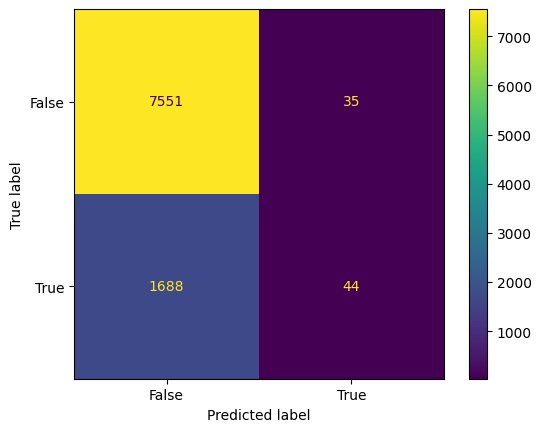

Root Mean Square Error:

0.4300127034067962


In [59]:
#Separating the dataframe
X = df9.drop(columns=['TARGET_ABUSER'])  # Features
y = df9['TARGET_ABUSER']  # Target variable
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = RandomForestClassifier()
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

## Data visualization using TSNE

In [60]:
#Separating the dataframe
X = df7.drop(columns=['TARGET_ABUSER'])  # Features
y = df7['TARGET_ABUSER']  # Target variable

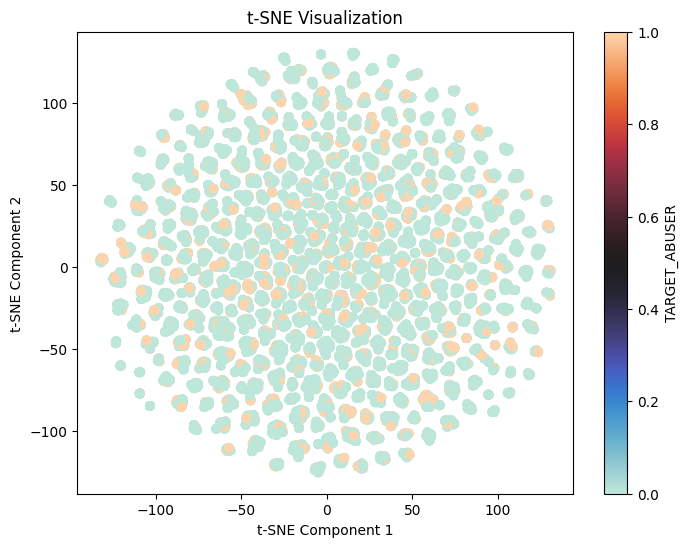

In [61]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='icefire')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.colorbar(label='TARGET_ABUSER')
plt.show()


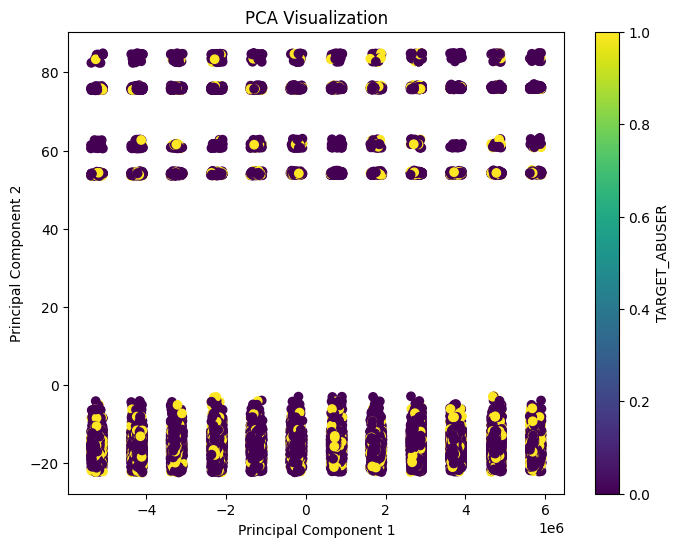

In [62]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='TARGET_ABUSER')
plt.show()